In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载数据
def load_data(filename,splitstyle = "\t"):
    dataset = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(splitstyle)
        m = len(lineArr)
        dataset.append(lineArr[0:m])
    return np.array(dataset,dtype=np.float64)

(1000, 2)


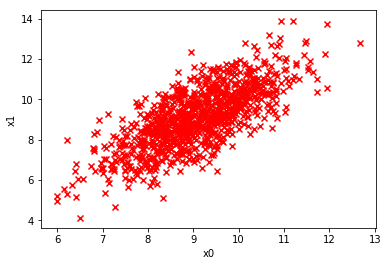

In [3]:
x = load_data("testSet.txt")
print (x.shape)

#可视化一下数据集合
plt.scatter(x[:,0],x[:,1],marker='x',color = 'r')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()



In [4]:
def pca(x,k):
    x_mean = np.mean(x,axis=0) # 每列的均值
    x_nor = x - x_mean
    x_cov = np.cov(x_nor,rowvar=0) #协方差矩阵 [n,n]
    
    eigvals,eigVecs = np.linalg.eig(x_cov) #计算协方差矩阵的特征值和特征向量

    eigvals_sortindex = np.argsort(eigvals) #对特征值进行排序,返回位置索引
    k_index = eigvals_sortindex[: -(k+1):-1] #取出 最后的k个（因为是从小到大排序的）所以倒过来数
    k_eigVecs = eigVecs[:,k_index] #只要最大的k个特征向量 [n,k]
    
    lowData = x_nor.dot(k_eigVecs) #降维的数据(m.k) =[m,n]*[n,k]
    recData = lowData.dot(k_eigVecs.T) + x_mean #恢复的数据(m,n) 加上x_mean,是为了还原到原来的范围
    
    return lowData,recData
    

In [5]:
lowData , recData = pca(x,k=1)
print (lowData.shape)
print (recData.shape)

(1000, 1)
(1000, 2)


  上述降维过程，首先根据数据矩阵的协方差的特征值和特征向量，得到最大的N个特征值对应的特征向量组成的矩阵，可以称之为压缩矩阵；得到了压缩矩阵之后，将去均值的数据矩阵乘以压缩矩阵，就实现了将原始数据特征转化为新的空间特征，进而使数据特征得到了压缩处理。   
  
  当然，我们也可以根据压缩矩阵和特征均值，反构得到原始数据矩阵，通过这样的方式可以用于调试和验证。  
  
  下图是通过matplotlib将原始数据点（十字形点）和第一主成分点（圆形点）绘制出来的结果。显然，第一主成分点占据着数据最重要的信息。


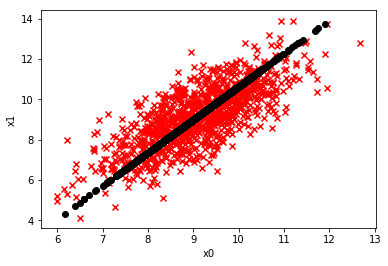

In [6]:
#可视化一下原始数据集合 以及 第一成分表示的集合
plt.scatter(x[:,0],x[:,1],marker='x',color = 'r')
plt.scatter(recData[:,0],recData[:,1],marker="o",color="black")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


## 示例：PCA对半导体数据降维

In [7]:
#现在导入secom.data数据集合，将其中的NaN数值替代为均值
def replaceNanWithMean():
    data = load_data("secom.data",splitstyle=" ")
    n = data.shape[1]
    for j in range(n):
        meanVal = np.mean(data[~np.isnan(data[:,j]),j]) #不是nan的平均值
        
        data[np.isnan(data[:,j]),j] = meanVal
    return data

data = replaceNanWithMean()
print (data.shape)

(1567, 590)


In [8]:
#根据特征值分析哪些主成分可以包含主要的信息（一般包含90%信息量即可）
#可以看到只需要前面的6个主成分，方差百分比和，就达到96.8%
data_mean = np.mean(data,axis=0)
data_removeMean = data - data_mean
data_cov = np.cov(data_removeMean,rowvar=0)
eigVal,eigVect = np.linalg.eig(data_cov)
print(eigVal)

eigVal_sortIndex = np.argsort(eigVal)
eigVal_sortIndex = eigVal_sortIndex[::-1] #倒序过来
sort_eigval = eigVal[eigVal_sortIndex]  #从大到小排序
totalval = np.sum(sort_eigval)
var_rate = sort_eigval / totalval *100

[ 5.34151979e+07  2.17466719e+07  8.24837662e+06  2.07388086e+06
  1.31540439e+06  4.67693557e+05  2.90863555e+05  2.83668601e+05
  2.37155830e+05  2.08513836e+05  1.96098849e+05  1.86856549e+05
  1.52422354e+05  1.13215032e+05  1.08493848e+05  1.02849533e+05
  1.00166164e+05  8.33473762e+04  8.15850591e+04  7.76560524e+04
  6.66060410e+04  6.52620058e+04  5.96776503e+04  5.16269933e+04
  5.03324580e+04  4.54661746e+04  4.41914029e+04  4.15532551e+04
  3.55294040e+04  3.31436743e+04  2.67385181e+04  1.47123429e+04
  1.44089194e+04  1.09321187e+04  1.04841308e+04  9.48876548e+03
  8.34665462e+03  7.22765535e+03  5.34196392e+03  4.95614671e+03
  4.23060022e+03  4.10673182e+03  3.41199406e+03  3.24193522e+03
  2.74523635e+03  2.35027999e+03  2.16835314e+03  1.86414157e+03
  1.76741826e+03  1.70492093e+03  1.66199683e+03  1.53948465e+03
  1.33096008e+03  1.25591691e+03  1.15509389e+03  1.12410108e+03
  1.03213798e+03  1.00972093e+03  9.50542179e+02  9.09791361e+02
  8.32001551e+02  8.08898

　从上面的特征值结果，我们可以看到如下几个重要信息：

（1）里面有很多值都是0，这意味着这些特征都是其他特征的副本，都可以通过其他特征来表示，其本身没有提供额外的信息。

（2）可以看到最前面的15个特征值得数量级都大于10<sup>5</sup>，而后面的特征值都变得非常小。这表明，所有特征中只有部分特征是重要特征。

In [9]:
print (var_rate[:20].ravel())

[59.25405798 24.12381887  9.15001359  2.30057852  1.45919235  0.51881753
  0.32265809  0.31467665  0.26307953  0.23130666  0.21753458  0.207282
  0.16908377  0.12559066  0.1203534   0.1140921   0.11111541  0.09245815
  0.09050319  0.0861447 ]


下图给出了了数据集前20个主成分占总方差的百分比：  

可以看出，数据的绝大部分方差都包含在前面的几个主成分中，舍弃后面的主成分并不会损失太多的信息。如果只保留前面几个最重要的主成分，那么在保留了绝大部分信息的基础上，可以将数据集特征压缩到一个非常低的程度，显然大大提高了计算效率。

前六个主成分覆盖了数据96.8%的方差，前二十个主成分覆盖了99.3%的方差。这表明，通过特征值分析，我们可以确定出需要保留的主成分及其个数，在数据集整体信息（总方差）损失很小的情况下，我们可以实现数据的大幅度降维。

一旦，通过特征值分析知道了需要保留的主成分个数，那么我们就可以通过pca函数，设定合适的N值，使得函数最终将数据特征降低到最佳的维度。

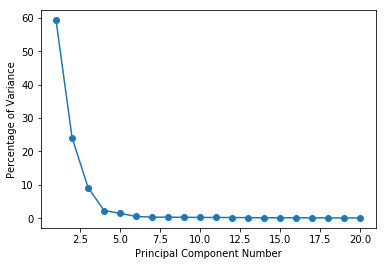

In [10]:
plt.plot(np.arange(1,21,1),var_rate[0:20],"-o")
plt.xlabel("Principal Component Number")
plt.ylabel("Percentage of Variance")
plt.show()

## 利用Sklearn实现PCA

In [11]:
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# 降维后的各主成分的方差值。方差值越大，则说明越是重要的主成分
pca.explained_variance_

array([7.93954312, 0.06045688])

In [12]:
# 降维后的各主成分的方差值占总方差值的比例，这个比例越大，则越是重要的主成分。
pca.explained_variance_ratio_

array([0.99244289, 0.00755711])

In [13]:
pca.singular_values_

array([6.30061232, 0.54980396])